## Telco Analysis

In [6]:
import pandas as pd

# Cargar el dataset comprimido en ZIP
df = pd.read_csv('telco_dataset.zip', compression='zip')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Mostrar la forma y las columnas del DataFrame
print(f"Forma del DataFrame: {df.shape}")
df.columns

Forma del DataFrame: (7043, 21)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Convertir la columna 'TotalCharges' a numérica, forzando errores a NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Estadísticas descriptivas

In [ ]:
# Obtener estadísticas descriptivas de 'tenure'
tenure_median = df['tenure'].median()
tenure_mode = df['tenure'].mode()[0]
tenure_stats = df['tenure'].describe()

print("Tenure Statistics")
print(tenure_stats)
print(f"median: {tenure_median} | mode: {tenure_mode}")
print()

Tenure Statistics
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
median: 29.0 | mode: 1



In [ ]:
# Obtener las estadísticas descriptivas de los cargos mensuales.
monthly_charges_median = df['MonthlyCharges'].median()
monthly_charges_mode = df['MonthlyCharges'].mode()[0]
monthly_charges_stats = df['MonthlyCharges'].describe()

print(f"Monthly Charges Statistics")
print(monthly_charges_stats)
print(f"median: {monthly_charges_median}, mode: {monthly_charges_mode}")

Monthly Charges Statistics
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
median: 70.35, mode: 20.05


In [9]:
# Obtener las estadísticas descriptivas de los cargos totales.
total_charges_median = df['TotalCharges'].median()
total_charges_mode = df['TotalCharges'].mode()[0]
total_charges_stats = df['TotalCharges'].describe()

print(f"Total Charges Statistics")
print(total_charges_stats)
print(f"median: {total_charges_median}, mode: {total_charges_mode}")

Total Charges Statistics
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
median: 1397.475, mode: 20.2


## Histogramas

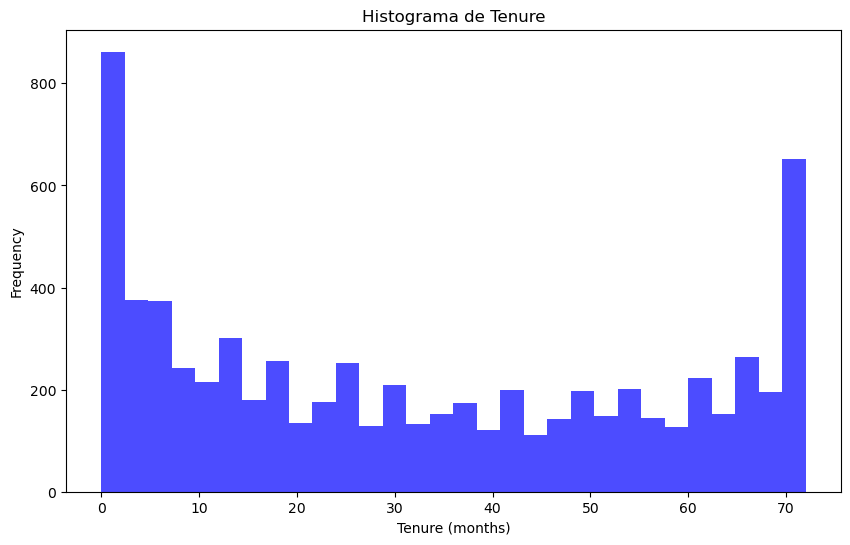

In [ ]:
import matplotlib.pyplot as plt

y_tenure = df['tenure']
plt.figure(figsize=(10, 6))
plt.title('Histograma de Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.hist(y_tenure, bins=30, color='blue', alpha=0.7)
plt.show()

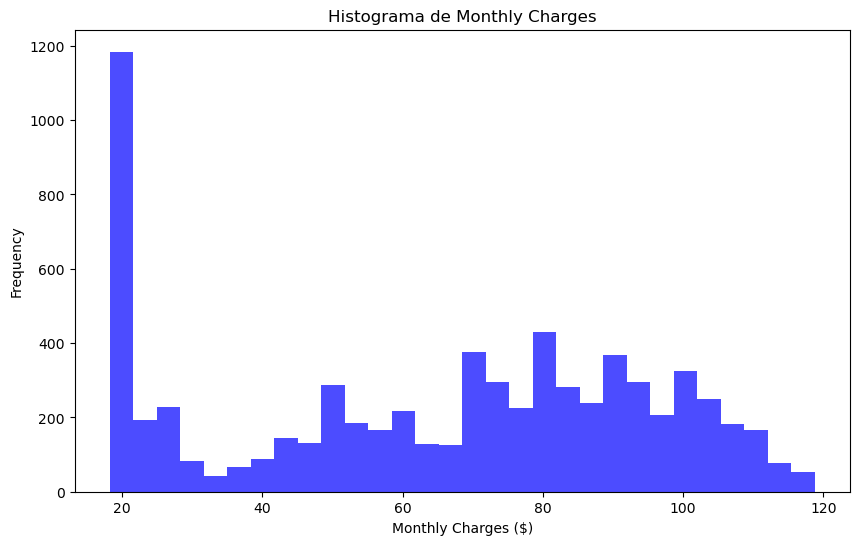

In [ ]:
y_monthly_charges = df['MonthlyCharges']
plt.figure(figsize=(10, 6))
plt.title('Histograma de Monthly Charges')
plt.xlabel('Monthly Charges ($USD)')
plt.ylabel('Frequency')
plt.hist(y_monthly_charges, bins=30, color='blue', alpha=0.7)
plt.show()

## With churn and no churn

In [29]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df_with_churn = df[df['Churn'] == 'Yes']
df_no_churn = df[df['Churn'] == 'No']

tenure_median_churn = df_with_churn['tenure'].median()
tenure_median_no_churn = df_no_churn['tenure'].median()

monthly_charges_median_churn = df_with_churn['MonthlyCharges'].median()
monthly_charges_median_no_churn = df_no_churn['MonthlyCharges'].median()

print(f"Tenure (Churn vs. No churn): {tenure_median_churn} vs. {tenure_median_no_churn}")
print(f"Monthly Charges (Churn vs. No churn): {monthly_charges_median_churn} vs. {monthly_charges_median_no_churn}")

Tenure (Churn vs. No churn): 10.0 vs. 38.0
Monthly Charges (Churn vs. No churn): 79.65 vs. 64.42500000000001


C:\Users\Orlando\AppData\Local\Temp\ipykernel_16732\3237198990.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_with_churn['MonthlyCharges'], df_no_churn['MonthlyCharges']], labels=['Churn', 'No Churn'])


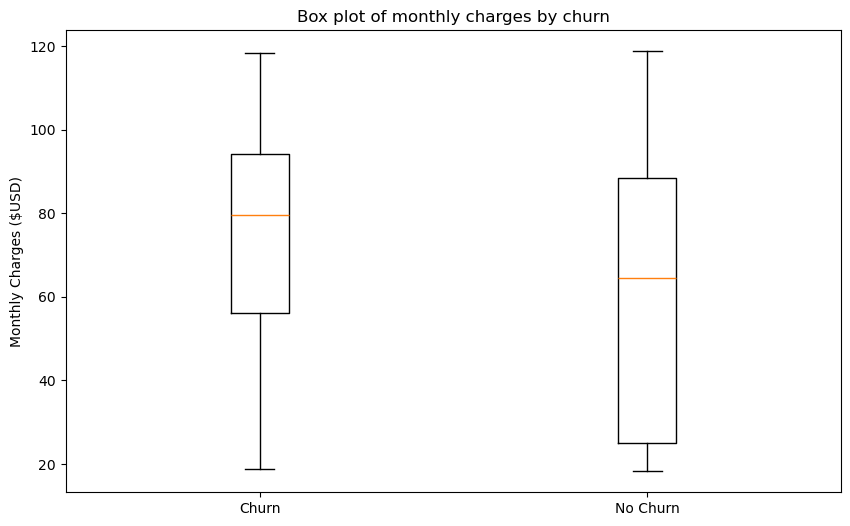

xd


In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of monthly charges by churn')
plt.boxplot([df_with_churn['MonthlyCharges'], df_no_churn['MonthlyCharges']], labels=['Churn', 'No Churn'])
plt.ylabel('Monthly Charges ($USD)')
plt.show()